## Packages

In [11]:
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# import standardscalor
from sklearn.preprocessing import StandardScaler 
# import recall score
from sklearn.metrics import recall_score, precision_score, f1_score, accuracy_score, roc_auc_score, accuracy_score

from plotnine import (ggplot, aes, geom_line, geom_point, geom_hline, geom_text,
                     theme_bw, theme, element_text, labs, theme_classic)


In [37]:
root_path = "../../Data/GoogleDrive/MLP_Results/"
baseline = pd.read_parquet(root_path + 'test_results-baseline.parquet')
result_2 = pd.read_parquet(root_path + 'test_results_lego_2-Under_Sample_1:1_threshold_20.parquet')
result_3 = pd.read_parquet(root_path + 'test_results_best_lego_3_2-Under_Sample_1:1_threshold_20.parquet')
result_4 = pd.read_parquet(root_path + 'test_results_best_lego_4_2-Under_Sample_1:1_threshold_20.parquet')
result_5 = pd.read_parquet(root_path + 'test_results_best_lego_5_2-Under_Sample_1:1_threshold_20.parquet')
result_6 = pd.read_parquet(root_path + 'test_results_best_lego_6_2-Under_Sample_1:1_threshold_20.parquet')
result_7 = pd.read_parquet(root_path + 'test_results_best_lego_7_3-Under_Sample_1:1_threshold_20.parquet')
result_8 = pd.read_parquet(root_path + 'test_results_best_lego_8_3-Under_Sample_1:1_threshold_20.parquet')
best_result = pd.read_parquet(root_path + 'test_results_best_params-Under_Sample_1:1_threshold_20.parquet')


In [38]:
best_result

,Dataset_Name,Grid_Variable,Parameters,Recall,ROC_AUC,Accuracy,Fit_Time
0,Under_Sample_1:1_threshold_20,_best_params,"{'hidden_layer_sizes': [47, 46, 46, 46], 'lear...",0.811796,0.814387,0.691627,162.356431


In [39]:
train_7 = pd.read_parquet(root_path + 'grid_results_best_lego_7_3-Under_Sample_1:1_threshold_20.parquet')
train_8 = pd.read_parquet(root_path + 'grid_results_best_lego_8_3-Under_Sample_1:1_threshold_20.parquet')

In [40]:
# put all results in a dataframe
results = pd.concat([baseline, result_2, result_3, result_4, result_5, result_6, result_7, result_8])
results.reset_index(drop=True, inplace=True)

In [41]:
results['step'] = results.index

In [42]:
results

,Dataset_Name,Grid_Variable,Parameters,Recall,ROC_AUC,Accuracy,Fit_Time,step
0,Under_Sample_1:1_threshold_20,baseline,"{'activation': 'relu', 'alpha': 0.0001, 'batch...",0.752738,0.814254,0.732085,67.248320,0
1,Under_Sample_1:1_threshold_20,_lego_2,"{'hidden_layer_sizes': [47, 46, 46, 46], 'solv...",0.721486,0.788470,0.740800,347.986998,1
2,Under_Sample_1:1_threshold_20,_best_lego_3_2,"{'activation': 'logistic', 'hidden_layer_sizes...",0.738414,0.773968,0.722578,387.493518,2
3,Under_Sample_1:1_threshold_20,_best_lego_4_2,"{'activation': 'logistic', 'hidden_layer_sizes...",0.757258,0.807951,0.719266,150.594047,3
4,Under_Sample_1:1_threshold_20,_best_lego_5_2,"{'activation': 'logistic', 'hidden_layer_sizes...",0.759862,0.809474,0.718147,134.959114,4
5,Under_Sample_1:1_threshold_20,_best_lego_6_2,"{'activation': 'logistic', 'hidden_layer_sizes...",0.766067,0.804127,0.710541,185.055771,5
6,Under_Sample_1:1_threshold_20,_best_lego_7_3,"{'activation': 'logistic', 'batch_size': 100, ...",0.777173,0.817858,0.716146,223.866392,6
7,Under_Sample_1:1_threshold_20,_best_lego_8_3,"{'activation': 'logistic', 'alpha': 0.0, 'batc...",0.736499,0.817038,0.741965,227.727516,7


### Expected input 

A dataframe with the following columns:
- `model`: the name of the model used 
- `parameters`: the parameters used in the grid search
- `test_score`: the test score of the best CV model (which will be recall


## Tuning Parameters

- binary parameter tuning: quick comparison of two values
- continuous parameter tuning: line plot
- multiple continuous parameters tuning: heatmap

### quick rundown of what the error analysis plot looks like 

- X-axis: Displays different parameter combinations as strings, representing the values of hidden_layer_sizes and alpha. Each point on the axis corresponds to a specific combination, like {'alpha': 0.0001, 'hidden_layer_sizes': (50,)}.

- Y-axis: Shows the mean cross-validation accuracy for each parameter setting. The scale depends on the accuracy scores obtained, typically ranging from 0 to 1.

- Error bars: Each point has an error bar that represents the standard deviation of the accuracy across the cross-validation folds. This gives an idea of the variability or stability of the model's performance with those specific parameters.

- Markers: Each parameter combination is represented by a circle ('o' marker) on the plot.

- Legend: The legend includes entries for each parameter setting, making it easier to identify which parameters correspond to each point on the plot.

(0.7, 0.8)

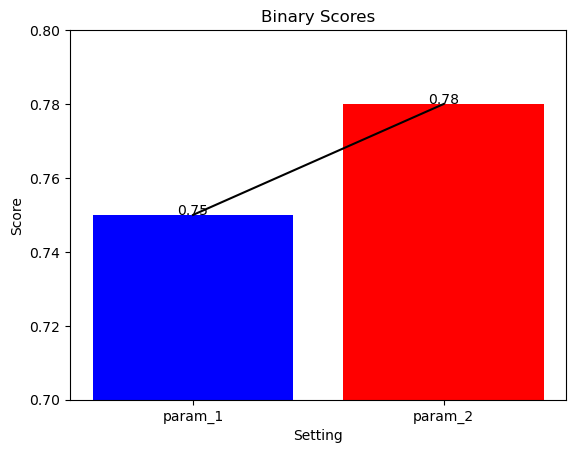

In [43]:
# for binary 
bi_score = [0.75, 0.78]
# bar plot for binary
plt.bar(['param_1', 'param_2'], bi_score, color = ['blue', 'red'])
# add line plot to show trend 
plt.plot(bi_score, color = 'black')
for i in range(2):
    plt.text(i, bi_score[i], round(bi_score[i], 3), ha = 'center')
plt.title('Binary Scores')
plt.xlabel('Setting')
plt.ylabel('Score')
# adjust the y-axis
plt.ylim(0.7, 0.8)

## Entire Training Process

- table of metrics
- line plot to show the fluctuation of metrics from the baseline to the final model

### what the plot contains

- X-axis: Displays the number of iterations or epochs, representing the training progress from the start to the end.

- Y-axis: Shows the value of the metric being tracked, such as loss or accuracy. The scale depends on the metric values obtained, typically ranging from 0 to 1.

two options: 

1. 
- Lines: Each line represents a different metric, such as training loss, validation loss, training accuracy, or validation accuracy. The lines show how the metric changes over time during training.

- Legend: The legend includes entries for each metric, making it easier to identify which line corresponds to each metric.

2. 

- Line: A single line represents the metric being tracked, such as training loss, validation loss, training accuracy, or validation accuracy. The line shows how the metric changes over time during training.

- Line sections: Different sections of the line can be colored or styled differently to indicate different stages of training (aka different tuning parameters).

In [44]:
# option 2
def plot_hyperparameters_tuning(scores):

    plt.figure(figsize=(12, 8))
    sns.lineplot(x='step', y='test_score', data=scores, marker='o', color='gray')
    # add line for baseline
    plt.axhline(y=scores['test_score'].iloc[0], color='black', linestyle='--')
    # add line for final model
    plt.axhline(y=scores['test_score'].iloc[-2], color='black', linestyle='--')
    # add arrow to show improvement
    plt.annotate('', (scores['step'].iloc[1] - 0.8, scores['test_score'].iloc[-2]), 
                 (scores['step'].iloc[1] - 0.8 , scores['test_score'].iloc[0]), 
                 arrowprops = dict(facecolor='black', shrink=0.18, width=0.6))
    # add text to show improvement in percentage
    plt.text(scores['step'].iloc[2] + 0.1, 
             (scores['test_score'].iloc[-2] + scores['test_score'].iloc[0]) / 2, 
             f'The recall on test data has improved by {round(scores["test_score"].iloc[-2] - scores["test_score"].iloc[0], 3)*100}%', 
             ha='center',
             # bold the text
             fontweight='bold')
    # point to the base model 
    plt.text(scores['step'].iloc[0] + 0.85, 
             scores['test_score'].iloc[0] - 0.002, 
             f"Baseline recall = {round(scores['test_score'][0], 3)}", 
             ha='center', fontsize=11, fontweight='bold')
    # point to the final model
    plt.text(scores['step'].iloc[-2] + 0.5, 
             scores['test_score'].iloc[-2] + 0.001, 
             f"Best recall = {round(scores['test_score'][6], 3)}", 
             color = 'g', ha='center',fontsize=11,fontweight='bold')
  
    plt.suptitle(' The tuning process of hyperparameters for the MLP model',
                 x = 0.34, fontsize = 14)
    plt.title('                 The building block approach shows the improvement in recall on the test set.\nThe steps (1,2) and (2,3) show the most significant improvements.',
              x = 0.3,fontsize = 12, fontstyle='italic')
    plt.xlabel('Number of Hyperparameters Tuned', fontsize=12)
    # adjust x limit 
    plt.ylabel('Recall on test set',fontsize=12)
    #plt.xticks(rotation=35)
    plt.grid(False)
    plt.show()

In [45]:
results['test_score'] = results['Recall']

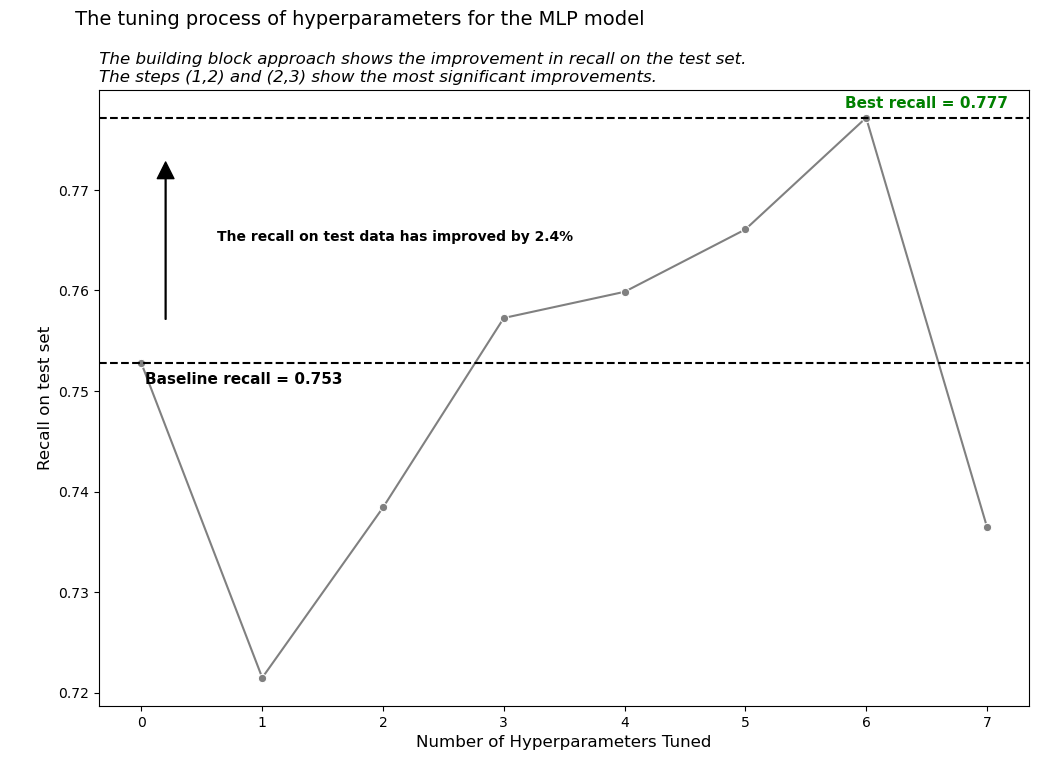

In [46]:
plot_hyperparameters_tuning(results)

#### ROC Curve

In [4]:
with open(root_path + 'best_model-baseline.pkl', 'rb') as f:
    base_model = pickle.load(f)


with open(root_path + 'best_model_best_lego_7_3-Under_Sample_1:1_threshold_20.pkl', 'rb') as f:
    model_7 = pickle.load(f)


with open(root_path + 'best_model_best_params-Under_Sample_1:1_threshold_20.pkl', 'rb') as be:
    best_model = pickle.load(be)

with open(root_path + 'xgb_model.pkl', 'rb') as f:
    xgb_model= pickle.load(f)

/Users/hinnz/Downloads/anaconda3/envs/BIOSTAT203C-24S/lib/python3.11/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator LabelBinarizer from version 1.2.2 when using version 1.4.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
/Users/hinnz/Downloads/anaconda3/envs/BIOSTAT203C-24S/lib/python3.11/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator MLPClassifier from version 1.2.2 when using version 1.4.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations


## Packages

In [ ]:
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# import standardscalor
from sklearn.preprocessing import StandardScaler 
# import recall score
from sklearn.metrics import recall_score

from plotnine import (ggplot, aes, geom_line, geom_point, geom_hline, geom_text,
                     theme_bw, theme, element_text, labs, theme_classic)


In [ ]:
root_path = "../../Data/GoogleDrive/MLP_Results/"
baseline = pd.read_parquet(root_path + 'test_results-baseline.parquet')
result_2 = pd.read_parquet(root_path + 'test_results_lego_2-Under_Sample_1:1_threshold_20.parquet')
result_3 = pd.read_parquet(root_path + 'test_results_best_lego_3_2-Under_Sample_1:1_threshold_20.parquet')
result_4 = pd.read_parquet(root_path + 'test_results_best_lego_4_2-Under_Sample_1:1_threshold_20.parquet')
result_5 = pd.read_parquet(root_path + 'test_results_best_lego_5_2-Under_Sample_1:1_threshold_20.parquet')
result_6 = pd.read_parquet(root_path + 'test_results_best_lego_6_2-Under_Sample_1:1_threshold_20.parquet')
result_7 = pd.read_parquet(root_path + 'test_results_best_lego_7_3-Under_Sample_1:1_threshold_20.parquet')
result_8 = pd.read_parquet(root_path + 'test_results_best_lego_8_3-Under_Sample_1:1_threshold_20.parquet')
best_result = pd.read_parquet(root_path + 'test_results_best_params-Under_Sample_1:1_threshold_20.parquet')


In [ ]:
best_result

,Dataset_Name,Grid_Variable,Parameters,Recall,ROC_AUC,Accuracy,Fit_Time
0,Under_Sample_1:1_threshold_20,_best_params,"{'hidden_layer_sizes': [47, 46, 46, 46], 'lear...",0.811796,0.814387,0.691627,162.356431


In [ ]:
train_7 = pd.read_parquet(root_path + 'grid_results_best_lego_7_3-Under_Sample_1:1_threshold_20.parquet')
train_8 = pd.read_parquet(root_path + 'grid_results_best_lego_8_3-Under_Sample_1:1_threshold_20.parquet')

In [ ]:
# put all results in a dataframe
results = pd.concat([baseline, result_2, result_3, result_4, result_5, result_6, result_7, result_8])
results.reset_index(drop=True, inplace=True)

In [ ]:
results['step'] = results.index

In [ ]:
results

,Dataset_Name,Grid_Variable,Parameters,Recall,ROC_AUC,Accuracy,Fit_Time,step
0,Under_Sample_1:1_threshold_20,baseline,"{'activation': 'relu', 'alpha': 0.0001, 'batch...",0.752738,0.814254,0.732085,67.248320,0
1,Under_Sample_1:1_threshold_20,_lego_2,"{'hidden_layer_sizes': [47, 46, 46, 46], 'solv...",0.721486,0.788470,0.740800,347.986998,1
2,Under_Sample_1:1_threshold_20,_best_lego_3_2,"{'activation': 'logistic', 'hidden_layer_sizes...",0.738414,0.773968,0.722578,387.493518,2
3,Under_Sample_1:1_threshold_20,_best_lego_4_2,"{'activation': 'logistic', 'hidden_layer_sizes...",0.757258,0.807951,0.719266,150.594047,3
4,Under_Sample_1:1_threshold_20,_best_lego_5_2,"{'activation': 'logistic', 'hidden_layer_sizes...",0.759862,0.809474,0.718147,134.959114,4
5,Under_Sample_1:1_threshold_20,_best_lego_6_2,"{'activation': 'logistic', 'hidden_layer_sizes...",0.766067,0.804127,0.710541,185.055771,5
6,Under_Sample_1:1_threshold_20,_best_lego_7_3,"{'activation': 'logistic', 'batch_size': 100, ...",0.777173,0.817858,0.716146,223.866392,6
7,Under_Sample_1:1_threshold_20,_best_lego_8_3,"{'activation': 'logistic', 'alpha': 0.0, 'batc...",0.736499,0.817038,0.741965,227.727516,7


### Expected input 

A dataframe with the following columns:
- `model`: the name of the model used 
- `parameters`: the parameters used in the grid search
- `test_score`: the test score of the best CV model (which will be recall


## Tuning Parameters

- binary parameter tuning: quick comparison of two values
- continuous parameter tuning: line plot
- multiple continuous parameters tuning: heatmap

### quick rundown of what the error analysis plot looks like 

- X-axis: Displays different parameter combinations as strings, representing the values of hidden_layer_sizes and alpha. Each point on the axis corresponds to a specific combination, like {'alpha': 0.0001, 'hidden_layer_sizes': (50,)}.

- Y-axis: Shows the mean cross-validation accuracy for each parameter setting. The scale depends on the accuracy scores obtained, typically ranging from 0 to 1.

- Error bars: Each point has an error bar that represents the standard deviation of the accuracy across the cross-validation folds. This gives an idea of the variability or stability of the model's performance with those specific parameters.

- Markers: Each parameter combination is represented by a circle ('o' marker) on the plot.

- Legend: The legend includes entries for each parameter setting, making it easier to identify which parameters correspond to each point on the plot.

(0.7, 0.8)

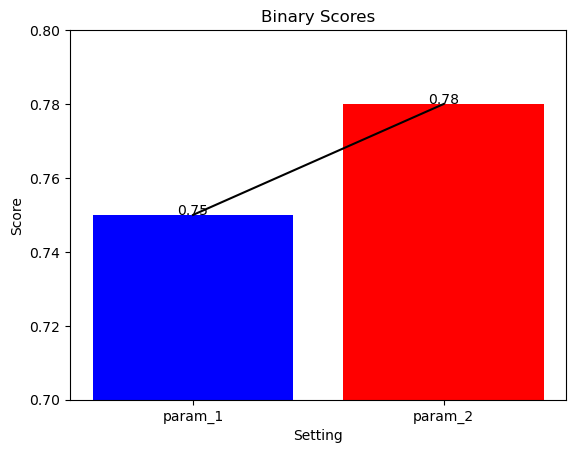

In [ ]:
# for binary 
bi_score = [0.75, 0.78]
# bar plot for binary
plt.bar(['param_1', 'param_2'], bi_score, color = ['blue', 'red'])
# add line plot to show trend 
plt.plot(bi_score, color = 'black')
for i in range(2):
    plt.text(i, bi_score[i], round(bi_score[i], 3), ha = 'center')
plt.title('Binary Scores')
plt.xlabel('Setting')
plt.ylabel('Score')
# adjust the y-axis
plt.ylim(0.7, 0.8)

## Entire Training Process

- table of metrics
- line plot to show the fluctuation of metrics from the baseline to the final model

### what the plot contains

- X-axis: Displays the number of iterations or epochs, representing the training progress from the start to the end.

- Y-axis: Shows the value of the metric being tracked, such as loss or accuracy. The scale depends on the metric values obtained, typically ranging from 0 to 1.

two options: 

1. 
- Lines: Each line represents a different metric, such as training loss, validation loss, training accuracy, or validation accuracy. The lines show how the metric changes over time during training.

- Legend: The legend includes entries for each metric, making it easier to identify which line corresponds to each metric.

2. 

- Line: A single line represents the metric being tracked, such as training loss, validation loss, training accuracy, or validation accuracy. The line shows how the metric changes over time during training.

- Line sections: Different sections of the line can be colored or styled differently to indicate different stages of training (aka different tuning parameters).

In [81]:
# option 2
def plot_hyperparameters_tuning(scores):

    plt.figure(figsize=(10, 6))
    sns.lineplot(x='step', y='test_score', data=scores, marker='o', color='gray')
    # add line for baseline
    plt.axhline(y=scores['test_score'].iloc[0], color='black', linestyle='--')
    # add line for final model
    plt.axhline(y=scores['test_score'].iloc[-2], color='black', linestyle='--')
    # add arrow to show improvement
    plt.annotate('', (scores['step'].iloc[1] - 0.8, scores['test_score'].iloc[-2]), 
                 (scores['step'].iloc[1] - 0.8 , scores['test_score'].iloc[0]), 
                 arrowprops = dict(facecolor='black', shrink=0.18, width=0.6))
    # add text to show improvement in percentage
    plt.text(scores['step'].iloc[2] + 0.1, 
             (scores['test_score'].iloc[-2] + scores['test_score'].iloc[0]) / 2, 
             f'The recall on test data has improved by {round(scores["test_score"].iloc[-2] - scores["test_score"].iloc[0], 3)*100}%', 
             ha='center',
             # bold the text
             fontweight='bold')
    # point to the base model 
    plt.text(scores['step'].iloc[0] + 0.85, 
             scores['test_score'].iloc[0] - 0.002, 
             f"Initial model recall = {round(scores['test_score'][0], 3)}", 
             ha='center', fontsize=11, fontweight='bold')
    # point to the final model
    plt.text(scores['step'].iloc[-2] + 0.5, 
             scores['test_score'].iloc[-2] + 0.001, 
             f"Final recall = {round(scores['test_score'][6], 3)}", 
             color = 'g', ha='center',fontsize=11,fontweight='bold')
  
    plt.suptitle(' The tuning process of hyperparameters for the MLP model',
                 x = 0.34, fontsize = 14)
    plt.title('                 The building block approach shows the improvement in recall on the test set.\nThe steps (1,2) and (2,3) show the most significant improvements.',
              x = 0.3,fontsize = 12, fontstyle='italic')
    plt.xlabel('Number of Hyperparameters Tuned', fontsize=12)
    # adjust x limit 
    plt.ylabel('Recall on test set',fontsize=12)
    #plt.xticks(rotation=35)
    plt.grid(False)
    plt.show()

In [82]:
results['test_score'] = results['Recall']

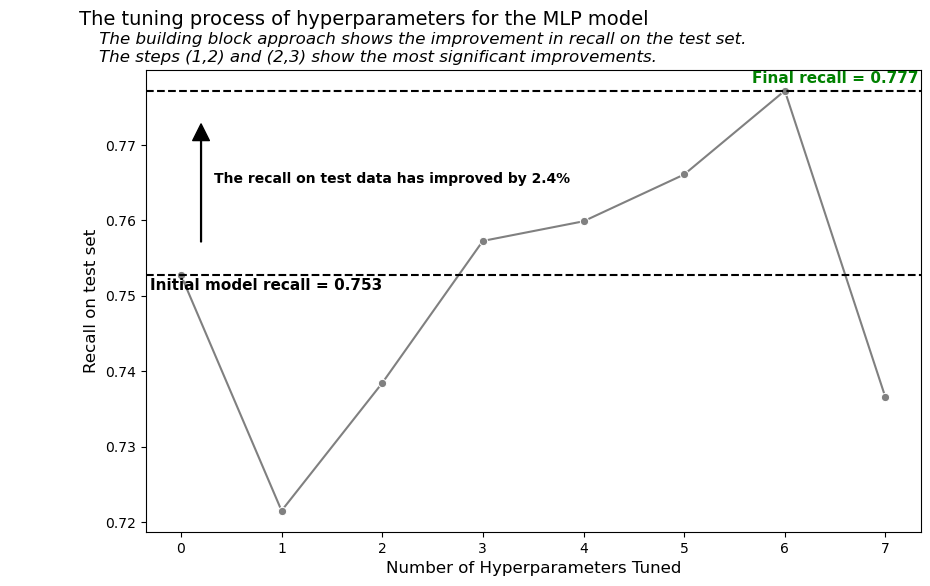

In [83]:
plot_hyperparameters_tuning(results)

#### ROC Curve

In [5]:
with open(root_path + 'best_model-baseline.pkl', 'rb') as f:
    base_model = pickle.load(f)


with open(root_path + 'best_model_best_lego_7_3-Under_Sample_1:1_threshold_20.pkl', 'rb') as f:
    model_7 = pickle.load(f)


with open(root_path + 'best_model_best_params-Under_Sample_1:1_threshold_20.pkl', 'rb') as be:
    best_model = pickle.load(be)

with open(root_path + 'xgb_model.pkl', 'rb') as f:
    xgb_model= pickle.load(f)

/Users/hinnz/Downloads/anaconda3/envs/BIOSTAT203C-24S/lib/python3.11/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator LabelBinarizer from version 1.2.2 when using version 1.4.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
/Users/hinnz/Downloads/anaconda3/envs/BIOSTAT203C-24S/lib/python3.11/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator MLPClassifier from version 1.2.2 when using version 1.4.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations


In [6]:
# import test data
y_test = pd.read_parquet('../../Data/GoogleDrive/MLP_Dataset/Under_Sample_1:1_threshold_20_y_test.parquet')
X_test = pd.read_parquet('../../Data/GoogleDrive/MLP_Dataset/Under_Sample_1:1_threshold_20_x_test.parquet')  
X_train = pd.read_parquet('../../Data/GoogleDrive/MLP_Dataset/Under_Sample_1:1_threshold_20_x_train.parquet')
y_train = pd.read_parquet('../../Data/GoogleDrive/MLP_Dataset/Under_Sample_1:1_threshold_20_y_train.parquet')

# drop the index column
X_train.drop(columns=['__index_level_0__'], errors='ignore', inplace=True)
y_train.drop(columns=['__index_level_0__'], errors='ignore', inplace=True)
X_test.drop(columns=['__index_level_0__'], errors='ignore', inplace=True)
y_test.drop(columns=['__index_level_0__'], errors='ignore', inplace=True)

y_test = y_test.to_numpy().ravel()
y_train = y_train.to_numpy().ravel()

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# predict on test data
y_pred = model_7.predict(X_test_scaled)

# get the probability of the positive class
y_prob = model_7.predict_proba(X_test_scaled)[:, 1]

In [7]:
# predict the best model
y_pred_best = best_model.predict(X_test_scaled)
# get the probability of the positive class
y_prob_best = best_model.predict_proba(X_test_scaled)[:, 1]


In [8]:
# predict the baseline model
y_pred_base = base_model.predict(X_test_scaled)
# get the probability of the positive class
y_prob_base = base_model.predict_proba(X_test_scaled)[:, 1]

In [19]:
# predict the xgb model
y_pred_xgb = xgb_model.predict(X_test_scaled)
# get the probability of the positive class
y_prob_xgb = xgb_model.predict_proba(X_test_scaled)[:, 1]

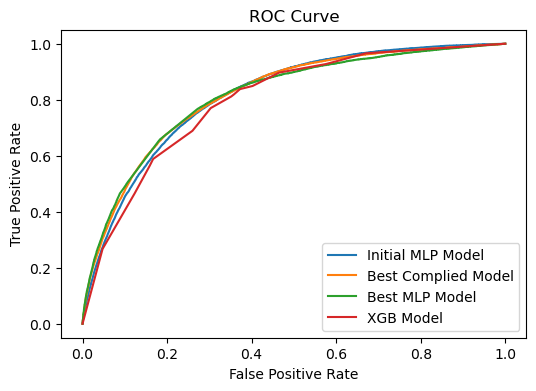

In [20]:
# roc curve for the three models
from sklearn.metrics import roc_curve, roc_auc_score

fpr_base, tpr_base, _ = roc_curve(y_test, y_prob_base)
fpr_7, tpr_7, _ = roc_curve(y_test, y_prob)
fpr_best, tpr_best, _ = roc_curve(y_test, y_prob_best)
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, y_prob_xgb)
plt.figure(figsize=(6, 4))
plt.plot(fpr_base, tpr_base, label='Initial MLP Model')
plt.plot(fpr_7, tpr_7, label='Best Complied Model')
plt.plot(fpr_best, tpr_best, label='Best MLP Model')
plt.plot(fpr_xgb, tpr_xgb, label='XGB Model')
# annotate the best score for the each model with dotted line

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
# change legend position
plt.legend(loc='lower right')
plt.show()

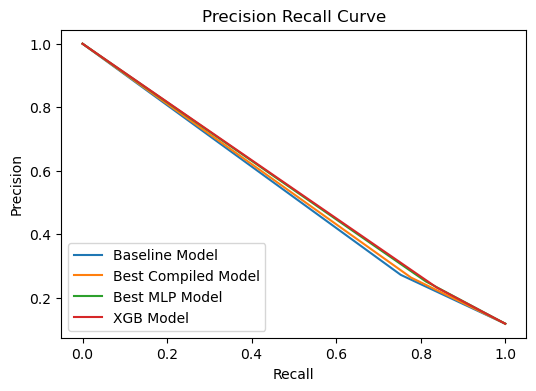

In [21]:
# pr curve for the three models
from sklearn.metrics import precision_recall_curve

precision_base, recall_base, _ = precision_recall_curve(y_test, y_pred_base)
precision_7, recall_7, _ = precision_recall_curve(y_test, y_pred)
precision_best, recall_best, thresh = precision_recall_curve(y_test, y_pred_best)
precision_xgb, recall_xgb, _ = precision_recall_curve(y_test, y_pred_xgb)

plt.figure(figsize=(6, 4))
plt.plot(recall_base, precision_base, label='Baseline Model')
plt.plot(recall_7, precision_7, label='Best Compiled Model')
plt.plot(recall_best, precision_best, label='Best MLP Model')
plt.plot(recall_xgb, precision_xgb, label='XGB Model')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision Recall Curve')
plt.legend(loc='lower left')
plt.show()

In [28]:
# table for vem
baseline_recall = recall_score(y_test, y_pred_base)
baseline_precision = precision_score(y_test, y_pred_base)

model_7_recall = recall_score(y_test, y_pred)
model_7_precision = precision_score(y_test, y_pred)

best_model_recall = recall_score(y_test, y_pred_best)
best_model_precision = precision_score(y_test, y_pred_best)

xgb_model_recall = recall_score(y_test, y_pred_xgb)
xgb_model_precision = precision_score(y_test, y_pred_xgb)

# create a dataframe

df = pd.DataFrame({'Model': ['XGB Model',
                             'Baseline', 
                             'Best Compiled Model', 
                             'Best MLP Model'],
                    'Recall': [0.705783, 
                                baseline_recall, 
                                model_7_recall, 
                                best_model_recall],
                    'Precision': [xgb_model_precision, 
                                  baseline_precision, 
                                  model_7_precision, 
                                  best_model_precision],
                    "ROC_AUC": [0.707385,
                                roc_auc_score(y_test, y_prob_base),
                                roc_auc_score(y_test, y_prob),
                                roc_auc_score(y_test, y_prob_best)],
                    "Accuracy": [0.662288,
                                 accuracy_score(y_test, y_pred_base),
                                 accuracy_score(y_test, y_pred),
                                 accuracy_score(y_test, y_pred_best)]})


                    